In [2]:
import nengo
import numpy as np
import matplotlib.pyplot as plt
import gym
from nengo.utils.matplotlib import rasterplot

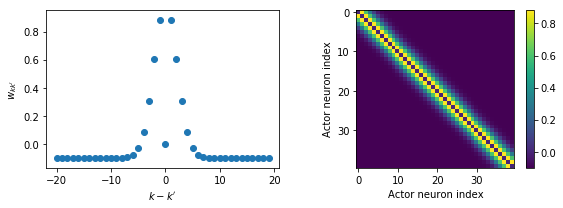

In [63]:
n_actor=40
lateral_sigma = 3
lateral_inhibition = 0.1

lateral_weights = np.zeros((n_actor, n_actor))
for k in range(n_actor):
    for k_p in range(n_actor):
        if k == k_p: continue # no self connection
        lateral_weight = (1+lateral_inhibition)*np.exp(-((k - k_p)/lateral_sigma)**2) - lateral_inhibition
        lateral_weights[k,k_p] = lateral_weight

# plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1,2,figsize=(8,3))

ax[0].scatter(np.arange(n_actor) - int(n_actor/2), lateral_weights[20])
ax[0].set_xlabel(r"$k-k'$")
ax[0].set_ylabel(r"$w_{kk'}$")
blah = ax[1].imshow(lateral_weights)
cbar = fig.colorbar(blah)
ax[1].set_xlabel('Actor neuron index')
ax[1].set_ylabel('Actor neuron index')
# ax[1].set_title('Lateral connection weights')



plt.tight_layout()

Text(0,0.5,'a(t)')

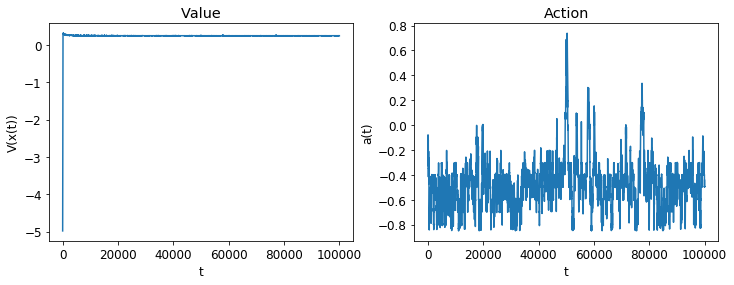

In [93]:
values = np.load('cache/values.npy')
actions = np.load('cache/actions.npy')

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(values, label='value')
ax[0].set_title('Value')
ax[0].set_ylabel('V(x(t))')
ax[0].set_xlabel('t')

ax[1].plot(actions)
ax[1].set_title(f'Action')
ax[1].set_xlabel('t')
ax[1].set_ylabel('a(t)')

Text(0.5,0,'Trial')

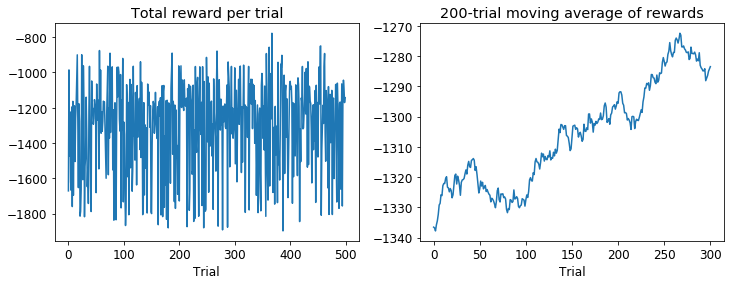

In [94]:
reward_history = np.load('cache/reward_history.npy')

fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].plot(reward_history)
ax[0].set_xlabel('Trial')
ax[0].set_title('Total reward per trial')

h = 200
ax[1].plot(np.convolve(reward_history, np.ones(h)/h, 'valid'))
ax[1].set_title(f'{h}-trial moving average of rewards')
ax[1].set_xlabel('Trial')

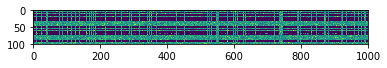

In [4]:
plt.imshow(np.load('cache/place_critic_weights.npy'))

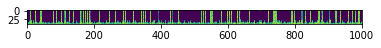

In [3]:
plt.imshow(np.load('cache/place_actor_weights.npy'))

In [54]:
# W = np.arange(15).reshape((3,5))
W = np.random.normal(loc=0.5, scale=0.1, size=(3, 5))
X = np.array([1,1,1,1,1])

np.dot(W,X)

array([2.51168221, 2.5713115 , 2.42747747])

In [99]:
import gym
T = 1

class Master():
    def __init__(self):
        self.env = gym.make('Pendulum-v0')
        self.env.seed(0)
        self.state = self.env.reset()
        self.done = False
        self.stepsize = 50
        self.dt = 1e-3
        
    def get_state(self, t):
        return self.state
    
    def step(self, t):
        if int(t / self.dt) % self.stepsize != 0:
            return 0
        
        action = self.env.action_space.sample()
        self.state, reward, self.done, info = self.env.step(action)
        if self.done:
            self.state = self.env.reset()
        return 0


n_neuron_vals = np.arange(100,1100,100)            
rmses = []
saved_place, saved_state = None, None
for n_place in n_neuron_vals:
    rmse_trials = []
    for trial in range(5):
        model = nengo.Network()
        master = Master()
        with model:
            step_node = nengo.Node(master.step)
            state_node = nengo.Node(master.get_state)
            place = nengo.Ensemble(n_place, 3, radius=5)
            nengo.Connection(state_node, place)

            place_probe = nengo.Probe(place, synapse=None)
            state_probe = nengo.Probe(state_node, synapse=None)

        with nengo.Simulator(model) as sim:
            sim.run(T)

        master.env.close()

        rmse = np.sqrt(np.mean((sim.data[place_probe] - sim.data[state_probe])**2))
        rmse_trials.append(rmse)
    rmses.append(np.mean(rmse_trials))
    if n_place == 600:
        saved_place = sim.data[place_probe]
        saved_state = sim.data[state_probe]



/Users/nolandey/anaconda/envs/tensorflow3/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

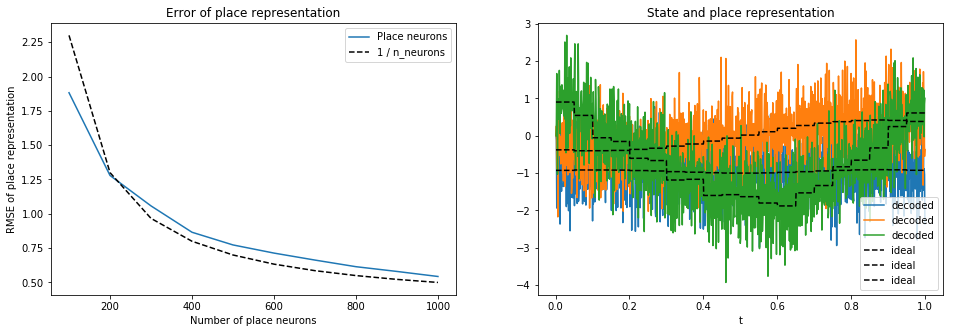

In [100]:
fig, ax = plt.subplots(1,2,figsize=(16,5))
ax[0].plot(n_neuron_vals, rmses, label='Place neurons')
ax[0].plot(n_neuron_vals, 0.3+200/n_neuron_vals, label='1 / n_neurons', linestyle='--', color='black')
ax[0].set_xlabel('Number of place neurons')
ax[0].set_ylabel('RMSE of place representation')
ax[0].set_title('Error of place representation')
ax[0].legend()

end = -1
ax[1].plot(sim.trange(), saved_place, label='decoded')
ax[1].plot(sim.trange(), saved_state, label='ideal', linestyle='--', color='black')
# ax[1].plot(sim.trange()[:end], sim.data[place_probe][:end], label='decoded')
# ax[1].plot(sim.trange()[:end], sim.data[state_probe][:end], label='ideal', linestyle='--', color='black')
ax[1].set_xlabel('t')
ax[1].set_title('State and place representation')
# ax[1].set_ylabel('RMSE of state representation')
ax[1].legend()

In [78]:
n_place = 100
n_actor = 100
tau_r = 10 # reward time constant
v_k = 30e-3#50e-3
tau_k = 50e-3#200e-3
eps_0 = 10e-3#20e-3
tau_m = 10e-3#20e-3
tau_s = 5e-3
tau_gamma = 50e-3
v_gamma = 20e-3

def get_state(t):
    return np.random.uniform(size=(3))

def outer(t, x):
    X_conv_eps = x[:n_place]
    Y = x[n_place:]
    return np.outer(Y, X_conv_eps).flatten()
    

model = nengo.Network(seed=0)
with model:
    state_node = nengo.Node(get_state)
    place = nengo.Ensemble(n_place,3)
    actor = nengo.Ensemble(n_actor,1)
#     nengo.Connection(state_node, place, solver=nengo.solvers.NoSolver())
    nengo.Connection(state_node, place)
    
    
    actor_outer = nengo.Node(outer,
                            size_in=n_place + n_actor,
                            size_out=n_place * n_actor)
    # convolve place spikes with epsilon
    nengo.Connection(place.neurons,
                     actor_outer[:n_place],
                     synapse=tau_m,
                     transform=((eps_0 * tau_m) / (tau_m - tau_s)))
    nengo.Connection(place.neurons,
                     actor_outer[:n_place],
                     synapse=tau_s,
                     transform=-((eps_0 * tau_s) / (tau_m - tau_s)))
    # Pass raw actor spikes into actor_outer
    nengo.Connection(actor.neurons, actor_outer[n_place:], synapse=None)

    
    yolo = nengo.Node(100*np.ones(n_actor))
    nengo.Connection(yolo, actor.neurons)
    
    
    action_selection_node = nengo.Node(output=None, size_in=1)
    nengo.Connection(actor,
                     action_selection_node, 
                     synapse=tau_gamma,
                     transform=tau_gamma/(tau_gamma - v_gamma))
    nengo.Connection(actor,
                     action_selection_node,
                     synapse=v_gamma,
                     transform=(-v_gamma)/(tau_gamma - v_gamma))
    
    
    actor_spikes = nengo.Probe(actor.neurons)
    place_spikes = nengo.Probe(place.neurons)
    
sim = nengo.Simulator(model)
with sim:
    sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

Text(0.5,1,'Place neuron spikes')

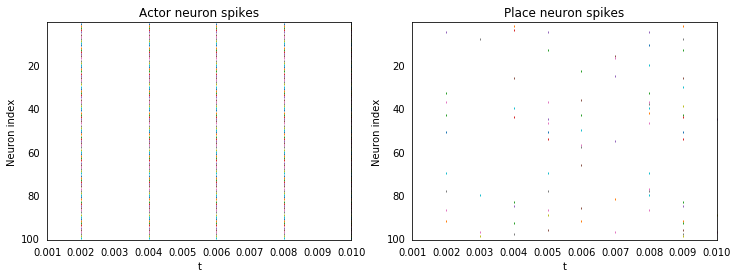

In [79]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
end = 10
rasterplot(sim.trange()[:end], sim.data[actor_spikes][:end], ax=ax[0])
ax[0].set_xlabel('t')
ax[0].set_ylabel('Neuron index')
ax[0].set_title('Actor neuron spikes')

rasterplot(sim.trange()[:end], sim.data[place_spikes][:end], ax=ax[1])
ax[1].set_xlabel('t')
ax[1].set_ylabel('Neuron index')
ax[1].set_title('Place neuron spikes')

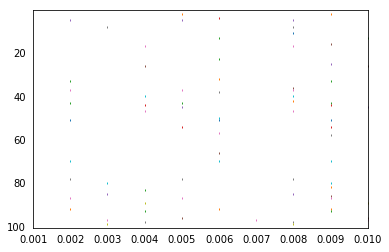

In [67]:
end = 10
rasterplot(sim.trange()[:end], sim.data[place_spikes][:end])

Text(0.5,0.98,'Synaptic filters')

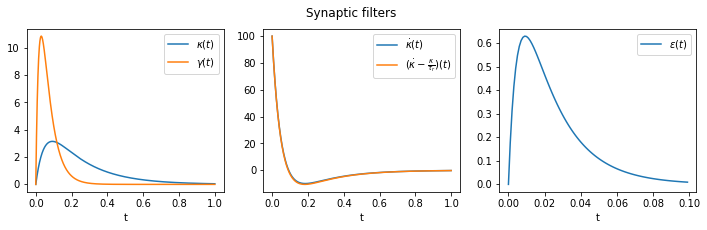

In [94]:
tau_r = 4 # reward time constant
# v_k = 30e-3#50e-3
# tau_k = 50e-3#200e-3
v_k = 50e-3
tau_k = 200e-3
eps_0 = 20e-3
tau_m = 20e-3
tau_s = 5e-3

# eps_0 = 5e-3
# tau_m = 5e-3
# tau_s = 2e-3

tau_gamma = 50e-3
v_gamma = 20e-3

def k(t):
    return ( np.exp(-t/tau_k) - np.exp(-t/v_k)) / (tau_k-v_k)

def k_dot(t):
    return ( -np.exp(-t/tau_k)/tau_k + np.exp(-t/v_k)/v_k) / (tau_k-v_k)

def epsp(s):
    return (eps_0/(tau_m - tau_s))*(np.exp(-s/tau_m)-np.exp(-s/tau_s))*np.heaviside(s, 1)

def gamma(t):
    return ( np.exp(-t/tau_gamma) - np.exp(-t/v_gamma)) / (tau_gamma-v_gamma)

ts = np.arange(0,1,1e-3)
fig, ax = plt.subplots(1,3, figsize=(12,3))
ax[0].plot(ts, k(ts), label=r'$\kappa(t)$')
ax[0].plot(ts, gamma(ts), label=r'$\gamma(t)$')
ax[1].plot(ts, k_dot(ts), label=r'$\dot{\kappa}(t)$')
ax[1].plot(ts, k_dot(ts) - k(ts)/tau_r, label=r'$(\dot{\kappa} - \frac{\kappa}{\tau_r})(t)$')

ts = np.arange(0,0.1,1e-3)
ax[2].plot(ts, epsp(ts), label=r'$\epsilon(t)$')
for i in range(3):
    ax[i].legend()
    ax[i].set_xlabel('t')
    
plt.suptitle('Synaptic filters')

In [ ]:
xs = []
def yolo(t, x):
    xs.append(x)

model = nengo.Network()
with model:
    nd_input = nengo.Node(lambda t: 1 if t % 0.1 == 0 else 0 ,size_out=1)
    td_error_node = nengo.Node(yolo, size_in=1)
#     nengo.Connection(critic.neurons, td_error_node, synapse=None)
    # convolve critic spikes with (K' - K/tau_r)
    nengo.Connection(nd_input,
                     td_error_node,
                     synapse=tau_k,
                     transform=((-tau_r - tau_k)/(tau_r*(tau_k-v_k))))
    nengo.Connection(nd_input,
                     td_error_node,
                     synapse=v_k,
                     transform=((tau_r + v_k)/(tau_r*(tau_k-v_k))))
    
with nengo.Simulator(model) as sim:
    sim.run(5)
    
plt.plot(xs)

In [ ]:
model = nengo.Network()
with model:
    nd_input = nengo.Node(lambda t: 1 if 0.1 < t < 0.4 else 0)
    ens1 = nengo.Ensemble(100,1)
    nengo.Connection(nd_input, ens1, synapse=0.05, transform=-1)
#     nengo.Connection(nd_input, ens1, synapse=0.05, transform=1)
    p0 = nengo.Probe(nd_input)
    p1 = nengo.Probe(ens1)
    p2 = nengo.Probe(ens1.neurons, attr='spikes')
    
dt = 1e-3
T = 0.5
with nengo.Simulator(model, dt=dt) as sim:
    sim.run(T)

ts = np.arange(0,T,dt)
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(ts, sim.data[p0])
ax[0].set_xlabel('t')
ax[0].set_title('Input')
ax[1].plot(ts, sim.data[p1])
ax[1].set_xlabel('t')
ax[1].set_title('First Ensemble')
ax[2].plot(ts, sim.data[p2][:])
ax[2].set_xlabel('t')
ax[2].set_title('Second Ensemble')

plt.tight_layout()

In [ ]:
model = nengo.Network()
with model:
    a = nengo.Ensemble(n_neurons=100, dimensions=1)
    b = nengo.Ensemble(n_neurons=50, dimensions=1)
    
w = 2*np.random.randn(b.n_neurons, a.n_neurons)/b.n_neurons
def my_rule(t, x):
    global w
    output = np.dot(w, x)*0.001
    w += np.random.randn(*w.shape)*0.01   # learning rule
    return output

def test(t,x):
    ensemble_spikes = x[:b.n_neurons]
    learner_spikes = x[b.n_neurons:]
    return np.sum(np.abs(ensemble_spikes - learner_spikes))

with model:
    learner = nengo.Node(my_rule, size_in=a.n_neurons,
                         size_out=b.n_neurons)

    nengo.Connection(a.neurons, learner, synapse=None)
    nengo.Connection(learner, b.neurons, synapse=0.05)
    
    test_node = nengo.Node(test, size_in=2*b.n_neurons)
    nengo.Connection(b.neurons, test_node[:b.n_neurons], synapse=None)
    nengo.Connection(learner, test_node[b.n_neurons:], synapse=None)
    
    test_probe = nengo.Probe(test_node, synapse=None)
    
with nengo.Simulator(model) as sim:
    sim.run(1)
    
plt.plot(sim.data[test_probe])

In [1]:
class LearningEnsemble(object):
    def __init__(self, n_neurons=128, dimensions=4, seed=0):
        self.model = nengo.Network(seed=seed)
        with self.model:
            self.ens = nengo.Ensemble(n_neurons=n_neurons,
                                      dimensions=dimensions,
                                      radius=2)
        self.sim = nengo.Simulator(self.model)
        
        self.w = np.zeros((3, n_neurons))
        
    def forward(self, x):
        _, act = nengo.utils.ensemble.tuning_curves(self.ens, self.sim, inputs=x)
        print(act.shape)
        y = self.w.dot(act)
        return y
    
    def train(self, x, error, learning_rate=1e-4):
        _, act = nengo.utils.ensemble.tuning_curves(self.ens, self.sim, inputs=x)
        
        delta = error.T.dot(act)
        self.w += -learning_rate*delta

e = LearningEnsemble()
e.forward([1,2,3,4])

NameError: name 'nengo' is not defined

In [ ]:
import gym
env = gym.make('Pendulum-v0')
for i_episode in range(n_episodes):
    observation = env.reset()
    print(observation)
    for t in range(100):
        env.render()
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        print(action, observation, reward, done, info)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()

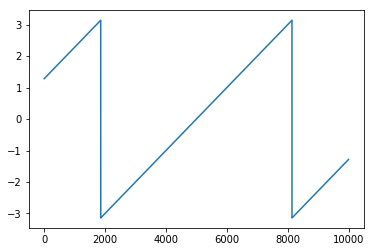

In [101]:
def angle_normalize(x):
    return (((x+np.pi) % (2*np.pi)) - np.pi)
xs = np.arange(-5,5,1e-3)
plt.plot(angle_normalize(xs))